#### 보간법 코드
1. 데이터의 column 별 null 값 비율 및 분포 확인(missingno)
2. 비율값과 null값의 균일 분포에 따른 보간 순위 정렬
3. 정렬된 순위의 변수의 선형성 검증
4. 조건을 만족하는 변수에 대해서 -> 보간법 수행( pandas interpolation or scipy interpolayion)
5. 옵션값을 주어 통계값으로 일괄 처리하는 함수(데이터의 속성파악해서 자동으로 판단할 수 있는 근거를 만들면 재밌을것같은데..일단 쉬운것 부터)
6. 선형성을 띄지 않거나 데이터가 불균일하게 비어있고, 연속적으로 널값이 존재하는 데이터의 처리 (고민)

In [3]:
# 기본 모듈 import
import numpy
import pandas
import matplotlib.pyplot as plt
import missingno
import warnings

warnings.filterwarnings(action='ignore')
def line_logging(*messages):
    import datetime
    import sys
    today = datetime.datetime.today()
    log_time = today.strftime('[%Y/%m/%d %H:%M:%S]')
    log = []
    for message in messages:
        log.append(str(message))
    print(log_time + '::' + ','.join(log) + '')
    sys.stdout.flush()

In [97]:
import missingno as msno
import matplotlib.pyplot as plt
# 1. null값 확인 하는 코드(input : DataFrame)
# index_col , target_col, null_ratio
df = pandas.read_csv("C:\\Users\\WAI\\PycharmProjects\\pythonProject\\data\\1.interpolation\\kamyr-digester.csv")
df.set_index("Observation",inplace=True)
# print(df.head())
# target : Y-Kappa
null_ratio = (round(df.isnull().sum()/301*100,3))
# print(null_ratio)
null_df = pandas.DataFrame(null_ratio, columns=["null_ratio"])

# null값의 비율을 어떻게 보고 정해야할지
# 10% 미만인 친구들은 선형성 검증하여 선형성을 띄고 있다면 바로 보간법 수행
a_list = null_df.loc[(null_df["null_ratio"] != 0) & (null_df["null_ratio"]<= 10 )].index.to_list()
#a_list.remove("Y-Kappa")
print(a_list)
y_target = df["Y-Kappa"]
from statsmodels.regression.linear_model import OLS

from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

y = df[a_list[0]].values

x_inter = pandas.Series(y).interpolate()
print(x_inter.tail())

print(x_inter.isnull().sum())

x_inter.isnull().sum()



'''
for colname in iter(a_list):
    #print(colname)
    #print(df[colname].head(1))
    model = OLS(df["Y-Kappa"], df[colname])
    result = model.fit()
    print(result.summary())
'''
# 10% 이상인 데이터는 등분산성 검증을 통해 등분산성을 띄는 데이터는 선형성 검증후 보간법 수행
#b_list = null_df.loc[(null_df["null_ratio"]<= 50) & (null_df["null_ratio"]> 10)].index.to_list()
#print(len(b_list))

# 아닌경우 케이스 처리
#msno_matrix = msno.matrix(df)

# Data read

['ChipRate', 'BF-CMratio', 'BlowFlow', 'ChipLevel4 ', 'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA', 'WhiteFlow-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ', 'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ', 'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ', 'T-Top-Chips-4 ']
296    14.233
297    15.167
298    15.167
299    15.167
300    15.167
dtype: float64
0


'\nfor colname in iter(a_list):\n    #print(colname)\n    #print(df[colname].head(1))\n    model = OLS(df["Y-Kappa"], df[colname])\n    result = model.fit()\n    print(result.summary())\n'

In [ ]:
df = pandas.read_csv("C:\\Users\\WAI\\PycharmProjects\\pythonProject\\data\\1.interpolation\\kamyr-digester.csv", index_col=False)
index_col = 'Observation'
target_col = "Y-Kappa"
interp_method = "linear"

df.set_index(index_col, inplace = True)
target_y = df[target_col]
df = df.drop(columns=[target_col], axis=0)
null_ratio = (round(df.isnull().sum()/301*100,3))
null_df = pandas.DataFrame(null_ratio, columns=["null_ratio"])
list_intp = null_df.loc[(null_df["null_ratio"] != 0) & (null_df["null_ratio"]<= 10 )].index.to_list()

#print(null_ratio_df)

# 데이터 보간을 할 수있는 비율에 맞는 컬럼 추출
for intp_col in iter(list_intp):
    line_logging(intp_col)
    prep_x = df[intp_col].values
    intp_x = pandas.Series(prep_x).interpolate(interp_method)
    #print(type(prep_x))
    #print(type(intp_x))
    #print(type(df[intp_col]))
    print(df[intp_col].head(1))
    df[intp_col] = intp_x.values

    print(df[intp_col].head(1))


(-2.0, 2.0)

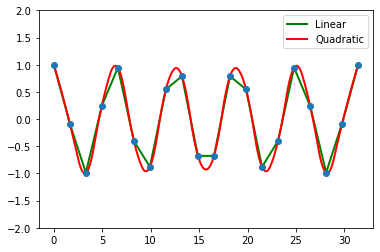

In [98]:
# scipy 를 사용한 interpolate ->
# 수식의 일반화를 통해 깊게 구현해보기 TODO
import numpy
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

x = numpy.linspace(0, 10 * numpy.pi, 20)
y = numpy.cos(x)

fl = interp1d(x, y, kind = 'linear')
fq = interp1d(x, y, kind = 'quadratic')

xint = numpy.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
# 결과는 numpy.ndarray
yintq = fq(xint)

plt.plot(xint, yintl, color = 'green', linewidth = 2)
plt.plot(xint, yintq, color = 'red', linewidth = 2)
plt.legend(['Linear','Quadratic'])
plt.plot(x,y, 'o')
plt.ylim(-2,2)

In [4]:
# Pandas Interpolate -> 단일 열에 대한, Seriese에 대한 보간
# 필요 모듈 import
import pandas
import warnings
import scipy
warnings.filterwarnings(action='ignore')

def line_logging(*messages):
    import datetime
    import sys
    today = datetime.datetime.today()
    log_time = today.strftime('[%Y/%m/%d %H:%M:%S]')
    log = []
    for message in messages:
        log.append(str(message))
    print(log_time + '::' + ','.join(log) + '')
    sys.stdout.flush()

# 데이터 보간 함수
def auto_interpolate(df : pandas.DataFrame, target_col : str , index_col: str,  null_ratio : int, interp_method:str):
    '''
    입력받은 데이터에서 null이 포함된 비율 기준으로 데이터를 뽑아 데이터를 보간하는 함수
    :parameter df: pandas.DataFrame : Input data type DataFrame
    :parameter target_col:str : Target column name for removing
    :parameter index_col:str : Index column name
    :parameter null_ratio : int : Criteria for selecting data to interpolate
    :parameter interp_method : str : Data interpolation methodology
     Parameters in to scipy.interpolate.interp1d
      ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’,
      ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ 등선언
    '''
    # null 값 확인
    df.set_index(index_col, inplace = True)
    target_y = df[target_col]
    df = df.drop(columns=[target_col], axis=0)
    null_ratio = (round(df.isnull().sum()/301*100,3))
    null_df = pandas.DataFrame(null_ratio, columns=["null_ratio"])

    list_intp = null_df.loc[(null_df["null_ratio"] != 0) & (null_df["null_ratio"]<= null_ratio )].index.to_list()

    for intp_col in iter(list_intp):
        line_logging(intp_col)
        prep_x = df[intp_col].values
        intp_x = pandas.Series(prep_x).interpolate(interp_method)
        df[intp_col] = intp_x.values
        df[target_col] = target_y

    check_col = null_df.loc[null_df["null_ratio"] > null_ratio].index.to_list()

    # TO_DO
    # 기준치 이상의 null을 보유한 컬럼의 정규성 검증
    for colname in iter(check_col):
        df[colname]

    return df

In [ ]:
df = pandas.read_csv("C:\\Users\\WAI\\PycharmProjects\\pythonProject\\data\\1.interpolation\\kamyr-digester.csv", index_col=False)
print(df.head(1))
intp_df = auto_interpolate(df, target_col="Y-Kappa",index_col="Observation",null_ratio=15, interp_method="linear")
print(intp_df.head(1))

df_null = pandas.DataFrame((round(df.isnull().sum()/len(df)*100,3)))
intp_null = pandas.DataFrame((round(intp_df.isnull().sum()/len(df)*100,3)))

result_df = pandas.concat([df_null, intp_null], axis=1)
print(result_df)

In [38]:
from scipy import stats

# 정규성 검정 및 선형성 검증
df = pandas.read_csv("C:\\Users\\WAI\\PycharmProjects\\pythonProject\\data\\1.interpolation\\kamyr-digester.csv", index_col=False)
df.set_index("Observation",inplace=True)

null_ratio = (round(df.isnull().sum()/301*100,3))
# print(null_ratio)
null_df = pandas.DataFrame(null_ratio, columns=["null_ratio"])
# null값의 비율을 어떻게 보고 정해야할지
# 10% 미만인 친구들은 선형성 검증하여 선형성을 띄고 있다면 바로 보간법 수행
check_col = null_df.loc[null_df["null_ratio"] > 10].index.to_list()
# 정규성 검정
for colname in iter(check_col):
    line_logging(colname)
    if len(df) <= 2000 :
        # Shapirowilk Test
        test_stats, p_val = stats.shapiro(df[colname].dropna().values)
    else :
        # Kolmogorov-Smirnov Test
        test_stats, p_val = stats.kstest(df[colname].dropna().values, 'norm')
        print(p_val)
    if(p_val > 0.5):
        print("정규성을 따르지 않음")
        check_col.remove(colname)
    else:
        # null이 아닌 데이터의 간격이 균일한지
        not_null_dt = numpy.where(df[colname].notnull())

        sum_diff = 0
        for i in range(0,len(not_null_dt[0])):
            if i < len(not_null_dt[0])-1:
                sum_diff += not_null_dt[0][i+1] - not_null_dt[0][i]

        # 모집단의 평균
        print(sum_diff/len(not_null_dt[0]))
        #ADI 의 개념 사용
        # Average Demand Interval ( 평균 수요 구간)
        print(len(df)/len(not_null_dt[0]))
        # MAPE
        print(round(numpy.abs((len(df)/len(not_null_dt[0])) - (sum_diff/len(not_null_dt[0]))) / (len(df)/len(not_null_dt[0])) * 100,3))

        # 정규성을 따른다.


    # 정규분포와의 잔차

[2021/06/30 11:46:45]::AAWhiteSt-4 
1.86875
1.88125
0.664
[2021/06/30 11:46:45]::SulphidityL-4 
1.86875
1.88125
0.664


<class 'numpy.ndarray'>


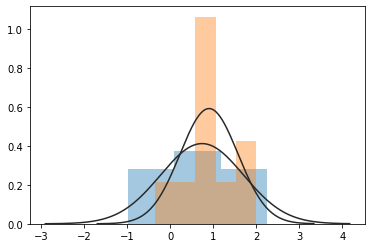

In [122]:
import seaborn

N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
numpy.random.seed(0)

x1 = stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = stats.norm(mu_2, sigma_2).rvs(N_2)
print(type(x1))
seaborn.distplot(x1, kde=False, fit=stats.norm)
seaborn.distplot(x2, kde=False, fit=stats.norm)
plt.show()

In [56]:
# Pandas Interpolate -> 단일 열에 대한, Seriese에 대한 보간
# 필요 모듈 import
import pandas
import warnings
import scipy
warnings.filterwarnings(action='ignore')

def line_logging(*messages):
    import datetime
    import sys
    today = datetime.datetime.today()
    log_time = today.strftime('[%Y/%m/%d %H:%M:%S]')
    log = []
    for message in messages:
        log.append(str(message))
    print(log_time + '::' + ','.join(log) + '')
    sys.stdout.flush()

# 데이터 보간 함수
def auto_interpolate(df : pandas.DataFrame, target_col : str , index_col: str,  null_ratio : int, interp_method:str):
    '''
    입력받은 데이터에서 null이 포함된 비율 기준으로 데이터를 뽑아 데이터를 보간하는 함수
    :parameter df: pandas.DataFrame : Input data type DataFrame
    :parameter target_col:str : Target column name for removing
    :parameter index_col:str : Index column name
    :parameter null_ratio : int : Criteria for selecting data to interpolate
    :parameter interp_method : str : Data interpolation methodology
     Parameters in to scipy.interpolate.interp1d
      ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’,
      ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ 등선언
    '''

    '''TO-BE
    1. 맨처음 값이 Null인 경우 처리방법 추가
    2. 기초통계값을 이용한 보간처리 추가
    3. 영향도 분석 등등 추가
    '''
    # null 값 확인
    df.set_index(index_col, inplace = True)
    target_y = df[target_col]
    df = df.drop(columns=[target_col], axis=0)
    null_ratio = (round(df.isnull().sum()/301*100,3))
    null_df = pandas.DataFrame(null_ratio, columns=["null_ratio"])
    # 기준 범위 내 null을 가지고 있는 데이터 보간 방법법
    list_intp = null_df.loc[(null_df["null_ratio"] != 0) & (null_df["null_ratio"]<= null_ratio )].index.to_list()
    for intp_col in iter(list_intp):
        #line_logging(intp_col)
        prep_x = df[intp_col].values
        if interp_method in ["polynomial","spline"]:
            # 3차 다항, 스플라인 사용 그이상의 차수는 고려
            # To-Be
            intp_x = pandas.Series(prep_x).interpolate(interp_method, order = 3)
            df[intp_col] = intp_x.values
        else:
            intp_x = pandas.Series(prep_x).interpolate(interp_method)
            df[intp_col] = intp_x.values

    # 2. 기준 비율 이상의 null을 가지고 있는 데이터 보간 방법
    check_col = null_df.loc[null_df["null_ratio"] > null_ratio].index.to_list()

    # TO_DO
    # 기준치 이상의 null을 보유한 컬럼의 정규성 검증
    for colname in iter(check_col):
        #line_logging(colname)
        if len(df) <= 2000 :
            # Shapirowilk Test
            test_stats, p_val = scipy.stats.shapiro(df[colname].dropna().values)
        else :
            # Kolmogorov-Smirnov Test
            test_stats, p_val = scipy.stats.kstest(df[colname].dropna().values, 'norm')

        if(p_val > 0.5):
            #print("정규성을 따르지 않음")
            check_col.remove(colname)
        else:
            # null이 아닌 데이터의 간격이 균일한지
            not_null_dt = numpy.where(df[colname].notnull())
            sum_diff = 0
            for i in range(0,len(not_null_dt[0])):
                if i < len(not_null_dt[0])-1:
                    sum_diff += not_null_dt[0][i+1] - not_null_dt[0][i]
            # 모집단의 평균
            #print(sum_diff/len(not_null_dt[0]))
            #ADI 의 개념 사용
            # Average Demand Interval ( 평균 수요 구간)
            #print(len(df)/len(not_null_dt[0]))
            # MAPE 오차율 비교하여 인덱스 차이 검증
            #print(round(numpy.abs((len(df)/len(not_null_dt[0])) - (sum_diff/len(not_null_dt[0]))) / (len(df)/len(not_null_dt[0])) * 100,3))
            mape_interval = round(numpy.abs((len(df)/len(not_null_dt[0])) - (sum_diff/len(not_null_dt[0]))) / (len(df)/len(not_null_dt[0])) * 100,3)

            if mape_interval < 10:
                prep_x = df[colname].values
                if interp_method in ["polynomial","spline"]:
                    # 3차 다항, 스플라인 사용 그이상의 차수는 고려
                    # To-Be
                    intp_x = pandas.Series(prep_x).interpolate(interp_method, order = 3)
                    df[intp_col] = intp_x.values
                else:
                    intp_x = pandas.Series(prep_x).interpolate(interp_method)
                    df[intp_col] = intp_x.values
            else:
                df.drop(columns=colname, inplace=True, axis=1)

    df[target_col] = target_y
    return df


In [72]:
df = pandas.read_csv("C:\\Users\\WAI\\PycharmProjects\\pythonProject\\data\\1.interpolation\\kamyr-digester.csv", index_col=False)
#print(df.head(1))

intp_df = auto_interpolate(df, target_col="Y-Kappa",index_col="Observation",null_ratio=15, interp_method="spline")
#print(intp_df.head(1))
print(intp_df["AAWhiteSt-4 "])
print(intp_df["SulphidityL-4 "])
print(numpy.where(intp_df["SulphidityL-4 "].isnull()))
df_null = pandas.DataFrame((round(df.isnull().sum()/len(df)*100,3)))
intp_null = pandas.DataFrame((round(intp_df.isnull().sum()/len(df)*100,3)))

result_df = pandas.concat([df_null, intp_null], axis=1)




Observation
31-00:00         NaN
31-01:00    6.076000
31-02:00    6.041541
31-03:00    6.054000
31-04:00    6.110000
              ...   
12-08:00    6.290966
12-09:00    6.340000
12-10:00    6.220000
12-11:00    6.306498
12-12:00    6.230000
Name: AAWhiteSt-4 , Length: 301, dtype: float64
Observation
31-00:00          NaN
31-01:00    29.110000
31-02:00    29.293721
31-03:00    29.020000
31-04:00    29.010000
              ...    
12-08:00    30.810140
12-09:00    30.290000
12-10:00    30.470000
12-11:00    30.860309
12-12:00    30.460000
Name: SulphidityL-4 , Length: 301, dtype: float64
(array([0], dtype=int64),)


0.33222591362126247